In [1]:
# Import library
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
dataset.head (20)

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000
5,1672906,2019-07-16,12748,Jakarta Utara,DKI Jakarta,P0710,BRAND_C,4,520000
6,1711399,2019-11-04,16791,Jakarta Barat,DKI Jakarta,P0860,BRAND_C,1,1465000
7,1695367,2019-09-26,13069,Surakarta,Jawa Tengah,P3342,BRAND_S,2,205000
8,1741846,2019-12-30,16873,Jakarta Barat,DKI Jakarta,P3203,BRAND_S,32,450000
9,1720189,2019-11-24,14723,Tangerang,Banten,P1701,BRAND_H,2,149000


In [2]:
#Membuat kolom order month
dataset['order_month'] = dataset['order_date'].apply(lambda x:datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

In [3]:
#Membuat kolom GMV
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

(0.0, 41.05)

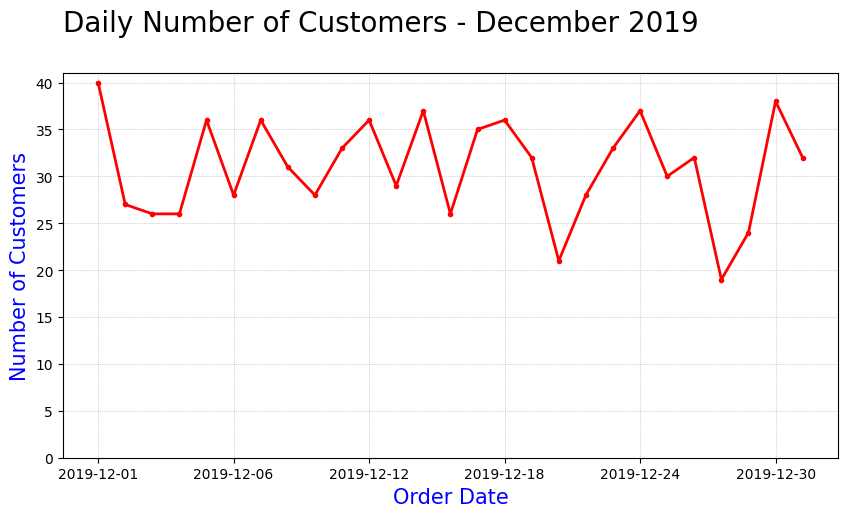

In [4]:
#Membuat plot grafik, sesuai intruksi
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Customers - December 2019', loc='left', pad=30, fontsize=20, color='black')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)

In [5]:
#Case 1:Buat variabel baru (e.g. dataset_top5brand_dec)
top_brands = (dataset[dataset ['order_month']=='2019-12'].groupby( 'brand')['quantity']
                    .sum()
                    .reset_index()
                    .sort_values(by='quantity', ascending=False)
                    .head (5))
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(
    top_brands['brand'].to_list()))]
top_brands

,brand,quantity
8,BRAND_S,2197
6,BRAND_P,2194
7,BRAND_R,1508
2,BRAND_C,1365
0,BRAND_A,1315


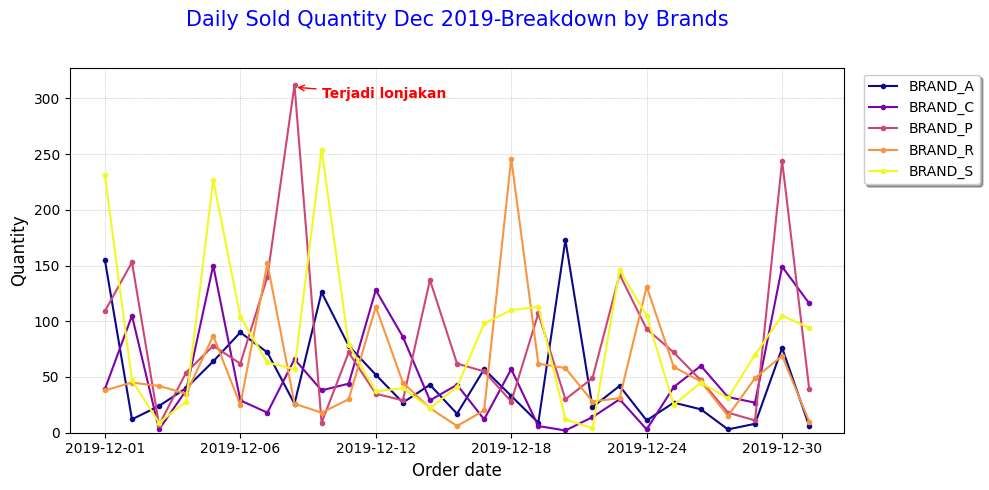

In [6]:
#Case 2: Multi-line chart daily quantity untuk brand top 5
#Melakukan analisis untuk top brands di bulan Desember 2019
import matplotlib.pyplot as plt
dataset_top5brand_dec.groupby(['order_date', 'brand' ])['quantity'].sum().unstack().plot (marker='.', cmap='plasma')
plt.title('Daily Sold Quantity Dec 2019-Breakdown by Brands', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Order date', fontsize = 12)
plt.ylabel('Quantity', fontsize = 12)
plt.grid(color= 'darkgray', linestyle=':', linewidth=0.5)
plt.ylim (ymin=0)
plt.legend (loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate( 'Terjadi lonjakan', xy=(7, 310), xytext=(8, 300),
                weight ='bold', color='red',
                arrowprops=dict(arrowstyle='->',
                                connectionstyle="arc3",
                                color='red'))
plt.gcf().set_size_inches (10, 5)
plt.tight_layout()
plt.show()

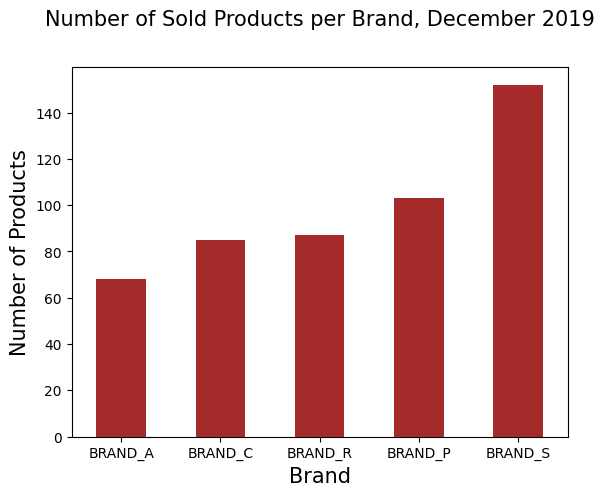

In [7]:
#case:3  jumlah product untuk masing-masing brand yang laku selama bulan Desember 2019.
import matplotlib.pyplot as plt
plt.clf()
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=True).plot(kind='bar', color='brown')
plt.title('Number of Sold Products per Brand, December 2019', loc='center', pad=30, fontsize=15, color='black')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products', fontsize= 15)
plt.ylim (ymin=0)
plt.xticks(rotation=0)
plt.show()

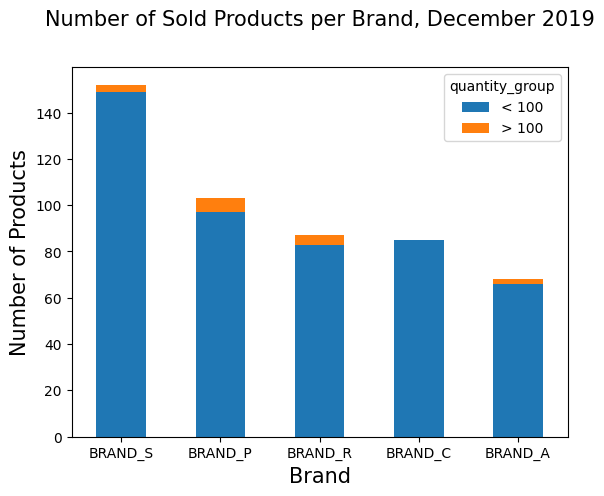

In [8]:
#case 4
import matplotlib.pyplot as plt
#membuat dataframe baru, untuk agregat jumlah quantity terjual per product
dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby([ 'brand', 'product_id'])[
    'quantity'].sum().reset_index()
#beri kolom baru untuk menandai product yang terjual >= 100 dan <100
dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product[
    'quantity'].apply(lambda x: '> 100' if x>=100 else '< 100')
dataset_top5brand_dec_per_product.sort_values( 'quantity', ascending=False, inplace=True)
#membuat referensi pengurutan brand berdasarkan banyaknya semua product
s_sort = dataset_top5brand_dec_per_product. groupby( 'brand')[ 'product_id'].nunique().sort_values (ascending=False)
#plot stacked barchart
dataset_top5brand_dec_per_product. groupby(['brand', 'quantity_group'])[
    'product_id'].nunique().reindex (index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Number of Sold Products per Brand, December 2019', loc='center', pad=30, fontsize=15, color='black')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products', fontsize= 15)
plt.ylim (ymin=0)
plt.xticks(rotation=0)
plt.show()

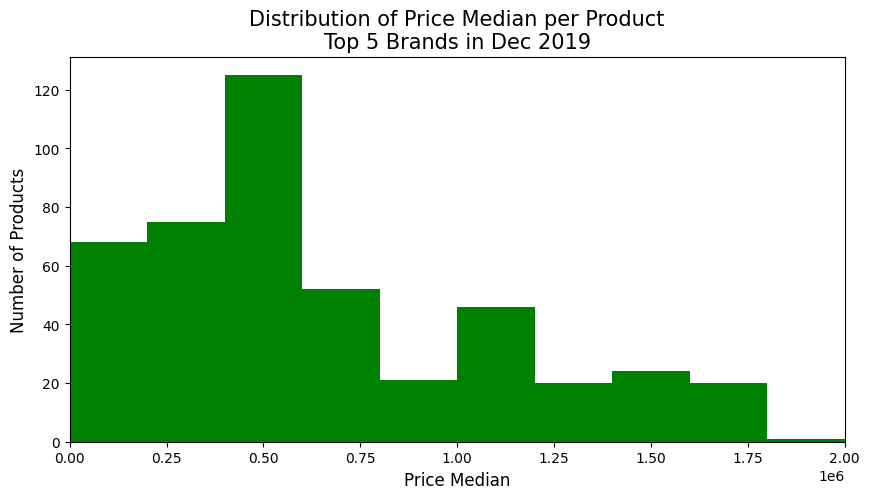

In [9]:
#case 5 (Gunakan histogram untuk melihat distribusi harga product-product yang ada di top 5 brand)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist (dataset_top5brand_dec.groupby('product_id')
          ['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='green')
plt.title('Distribution of Price Median per Product\nTop 5 Brands in Dec 2019', fontsize=15, color='black')
plt.xlabel('Price Median', fontsize= 12)
plt.ylabel('Number of Products', fontsize= 12)
plt.xlim(xmin=0,xmax=2000000)
plt.show()

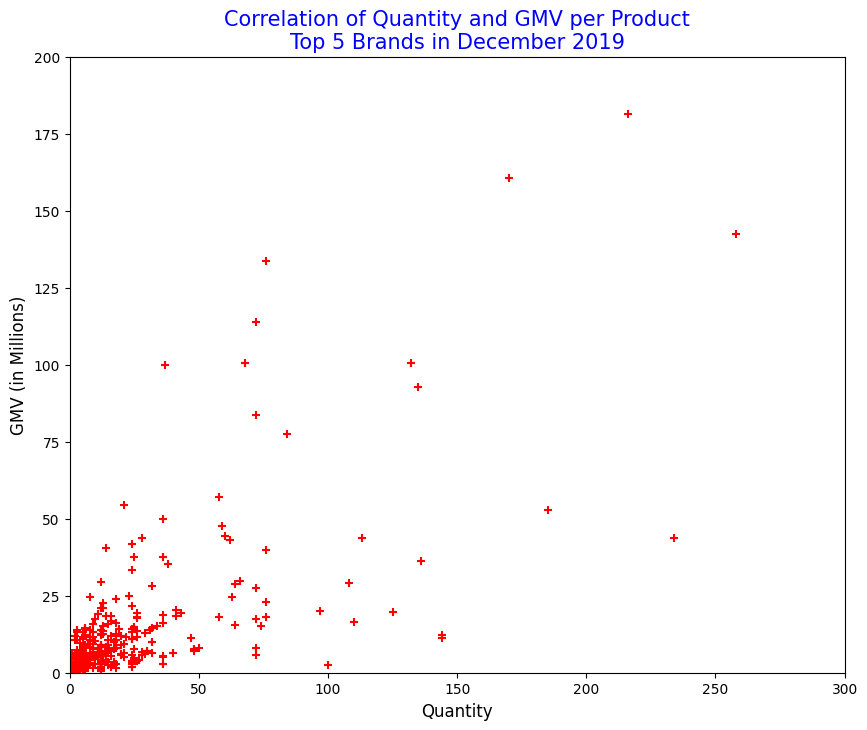

In [ ]:
#Casimport matplotlib.pyplot as plt
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby(
     'product_id').agg({'quantity': 'sum', 'gmv': 'sum', 'item_price': 'median'}).reset_index()
#scatter plot
plt.figure(figsize=(10,8))
plt.scatter (data_per_product_top5brand_dec[ 'quantity'], data_per_product_top5brand_dec['gmv' ], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)', fontsize= 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim (ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype (int))
plt.show()

<Figure size 640x480 with 0 Axes>

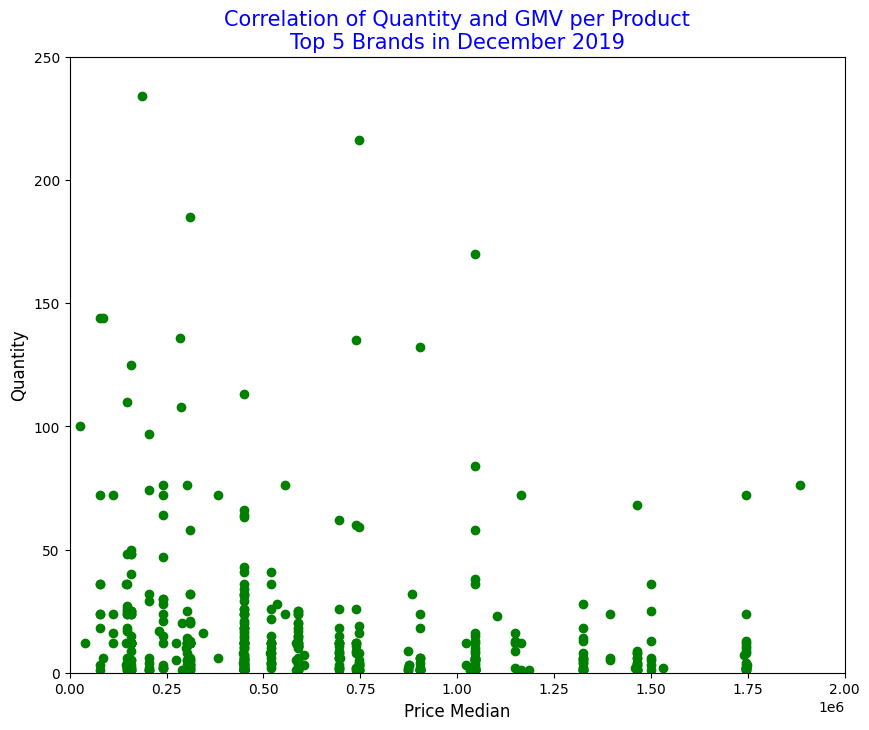

In [10]:
# case 6b Korelasi median harga vs quantity
import matplotlib.pyplot as plt
plt.clf()
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby( 'product_id').agg({
    'quantity': 'sum', 'gmv': 'sum', 'item_price': 'median'}).reset_index()
#scatter plot
plt.figure(figsize=(10,8))
plt.scatter (data_per_product_top5brand_dec['item_price'], data_per_product_top5brand_dec[
    'quantity'], marker='o', color='green')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019', fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize=12)
plt.ylabel('Quantity', fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim (ymin=0,ymax=250)
plt.show()